In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.lines as lines
from wordcloud import WordCloud
from PIL import Image

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#marking all null values to missing

df.fillna({'director':'Missing'},inplace=True)

df.fillna({'cast':'Missing'},inplace=True)

df.fillna({'country':'Missing'},inplace=True)


df['count'] = 1
df['country_'] = df['country'].apply(lambda x: x.split(",")[0])


In [8]:
#replacing country names to shorter version
df['country_'].replace('United States', 'USA', inplace=True)
df['country_'].replace('United Kingdom', 'UK',inplace=True)
df['country_'].replace('South Korea', 'S. Korea',inplace=True)
df_filtered = df.dropna()

In [9]:
df_filtered.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
count           0
country_        0
dtype: int64

In [10]:
df_filtered.shape

(8790, 14)

In [11]:
df_filtered.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'count', 'country_'],
      dtype='object')

In [12]:
df_content_type = df_filtered['type'].value_counts().reset_index()
df_content_type['proportion'] = df_content_type['count'].apply(lambda x: (x/sum(df_content_type['count']))*100)
df_content_type

,type,count,proportion
0,Movie,6126,69.692833
1,TV Show,2664,30.307167


In [13]:
df_filtered.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,country_
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,USA
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Missing
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Missing
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,India


In [14]:
df_filtered['year_added'] = df_filtered['date_added'].apply(lambda x : int(x.strip().split(',')[-1]))

/var/folders/71/bd2kt1xj307fbxvby6rs21nw0000gn/T/ipykernel_47428/1429628515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_added'] = df_filtered['date_added'].apply(lambda x : int(x.strip().split(',')[-1]))


In [15]:
df_release_year = df_filtered['release_year'].value_counts().reset_index()
df_release_year['proportion'] = df_release_year['count'].apply(lambda x: (x/sum(df_release_year['count']))*100)
df_release_year.head(10)

,release_year,count,proportion
0,2018,1146,13.037543
1,2017,1030,11.717861
2,2019,1030,11.717861
3,2020,953,10.841866
4,2016,901,10.250284
5,2021,592,6.734926
6,2015,555,6.313993
7,2014,352,4.004551
8,2013,286,3.253697
9,2012,236,2.684869


In [ ]:
#Data Cleaning

    country_  count
0        USA   3211
1      India   1008
2         UK    628
3     Canada    271
4      Japan    259
5     France    212
6   S. Korea    211
7      Spain    181
8     Mexico    134
9  Australia    117


/var/folders/71/bd2kt1xj307fbxvby6rs21nw0000gn/T/ipykernel_47428/3808327492.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, fontfamily='serif', rotation=0, color='white')


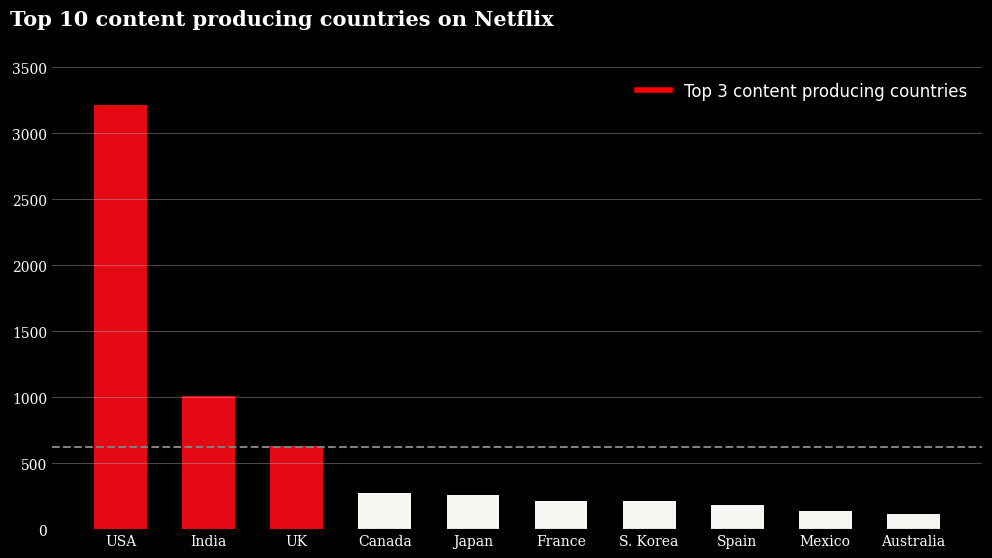

In [16]:
data = df[df['country_'] != 'Missing']
data = data.groupby('country_')['count'].sum().sort_values(ascending=False)[:10]
data2 = data.reset_index()
print(data2)
mean_content_count = data2['count'].mean()
color_map = ['#f5f5f1' for _ in range(10)]
color_map[:3] = ['#E50914'] * 3
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_facecolor('black')
ax.set_facecolor('black')
bars = ax.bar(data.index, data, width=0.6, color=color_map)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0, color='white')

mean_content = plt.Line2D([], [], color='red', linestyle='--', marker='', label=f'Mean Content count: {mean_content_count:.2f}')
plt.axhline(y=mean_content_count, color='grey', linestyle='--', label=f'Mean content count: {mean_content_count:.2f}')

ax.legend([mean_content], ['Mean content count'], loc='upper left', frameon=False, fontsize=12, labelcolor='white')

ax.grid(axis='y', linestyle='-', alpha=0.4)
y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontfamily='serif', color='white')
ax.tick_params(axis='both', which=u'both', length=0)
fig.text(0.09, 0.95, 'Top 10 content producing countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif', color='white')
top3_legend_artists = [plt.Line2D([0], [0], color='red', lw=4)]
ax.legend(top3_legend_artists, ['Top 3 content producing countries'], loc='upper right', frameon=False, fontsize=12, labelcolor='white')
plt.show()


In [17]:
df_country = df_filtered['country_'].value_counts().reset_index()
df_country['proportion'] = df_country['count'].apply(lambda x: (x/sum(df_country['count']))*100)
df_country.head(10)

,country_,count,proportion
0,USA,3202,36.427759
1,India,1008,11.467577
2,Missing,829,9.431172
3,UK,627,7.133106
4,Canada,271,3.083049
5,Japan,257,2.923777
6,France,212,2.411832
7,S. Korea,211,2.400455
8,Spain,181,2.059158
9,Mexico,134,1.524460


In [18]:
# Source of these ratings-- notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly 

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [19]:
df_filtered['rating_n'] = df_filtered['rating'].apply(lambda x: ratings_ages[x])

/var/folders/71/bd2kt1xj307fbxvby6rs21nw0000gn/T/ipykernel_47428/2308791855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating_n'] = df_filtered['rating'].apply(lambda x: ratings_ages[x])


In [20]:

grouped_data = df_filtered.groupby(['rating_n', 'type'])['show_id'].count().reset_index()


top_ratings = grouped_data.groupby('rating_n')['show_id'].sum().nlargest(9).index
grouped_data = grouped_data[grouped_data['rating_n'].isin(top_ratings)]


color_discrete_map = {'Movie': '#E50914', 'TV Show': 'white'} 

fig = px.bar(grouped_data, x='rating_n', y='show_id', color='type',
             color_discrete_map=color_discrete_map,
             labels={'rating_n': 'Rating', 'show_id': 'Number of Contents Released'},
             title='Number of Contents released for each Rating and Type',
             barmode='group')


fig.update_layout(
    title=dict(text="Number of Contents released for each Rating and Type", font=dict(size=28), yref='paper'),
    font_family="serif",
    plot_bgcolor='black',     
    paper_bgcolor='black',    
    font_color='white',       
    legend_title_text='Type',  
    legend_font=dict(size=14),  
    xaxis_categoryorder='total descending', 
    yaxis=dict( categoryorder='total descending', linewidth=2,tickfont = dict(size=14)),
    xaxis=dict(tickfont = dict(size=14)),
    bargap=0.3,
    width=800,                 
    height=600                 
)
fig.update_yaxes(title_font = {"size": 18})
fig.update_xaxes(title_font = {"size": 18})
fig.show()


In [21]:

genres = df_filtered['listed_in'].str.split(',').explode().str.strip()

genre_counts = genres.value_counts()

top_20_genres = genre_counts.nlargest(20)

fig = go.Figure()

for genre, count in top_20_genres.items():
    fig.add_trace(go.Scatter(y=[genre, genre], x=[0, count], mode='lines', line=dict(color='white')))

fig.add_trace(go.Scatter(y=list(top_20_genres.index), x=top_20_genres.values, mode='markers',
                         marker=dict(color='red', size=10), showlegend=False))

fig.update_layout(
    title=dict(text="Top 20 Genres of Movies and TV Shows", font=dict(size=25)),
    yaxis_title="Genre",
    font_family="serif",
    xaxis_title="Count of movies/TV Shows",
    xaxis_tickangle=0,
    showlegend=False,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    yaxis=dict(showgrid=False, tickmode='array', tickvals=top_20_genres.index[::-1], categoryorder='total ascending', linewidth=2,tickfont = dict(size=14)),
    xaxis=dict(showgrid=False, tickvals=list(range(0, top_20_genres.max()+1, 250)),tickfont = dict(size=14)),
    width=1200,
    height=800,
    margin=dict(l=150, r=50, b=50, t=50)
)
fig.update_yaxes(title_font = {"size": 18})
fig.update_xaxes(title_font = {"size": 18})
fig.update_layout(title_x=0.5, title_y=0.97, title_font=dict(size=20))
fig.show()


In [22]:
df_filtered.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,country_,year_added,rating_n
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,USA,2021,Teens
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,South Africa,2021,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Missing,2021,Adults
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Missing,2021,Adults
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,India,2021,Adults


In [23]:
df_filtered['month_added']=df_filtered['date_added'].apply(lambda x: x.strip().split(' ')[0])

/var/folders/71/bd2kt1xj307fbxvby6rs21nw0000gn/T/ipykernel_47428/1922788017.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



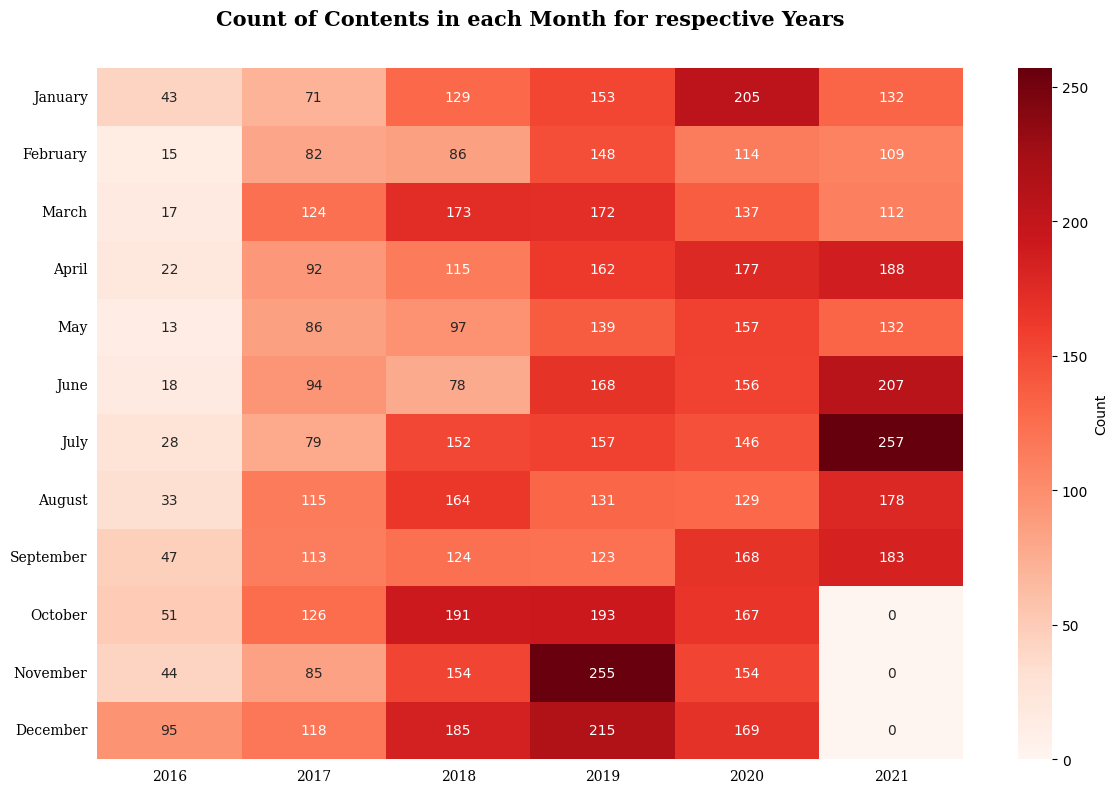

In [24]:

df_filtered = df_filtered[(df_filtered['year_added'] >= 2016) & (df_filtered['year_added'] <= 2021)]
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_filtered['month_added'] = pd.Categorical(df_filtered['month_added'], categories=month_order, ordered=True)

grouped_data = df_filtered.groupby(['year_added', 'month_added']).size().reset_index(name='count')

pivot_data = grouped_data.pivot(index='month_added', columns='year_added', values='count')

pivot_data = pivot_data.fillna(0).astype(int)


x_labels = pivot_data.columns.tolist()
y_labels = pivot_data.index.tolist()


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Count'})
plt.title('Count of Contents in each Month for respective Years', fontsize=15, fontweight='bold', fontfamily='serif', y=1.05)
plt.xlabel('', fontsize=13)
plt.ylabel('', fontsize=13)
ax = plt.gca()
ax.set_facecolor('#f0f0f0') 
plt.tick_params(left=False, bottom=False, labelrotation=45) 
ax.set_xticklabels(x_labels, rotation=0, fontfamily='serif') 
ax.set_yticklabels(y_labels, rotation=0, fontfamily='serif') 
plt.tight_layout()  
plt.show()





In [25]:
#Infrence : If a producer want to add new content on netflix than march and may are better options since less content is being added in those months.

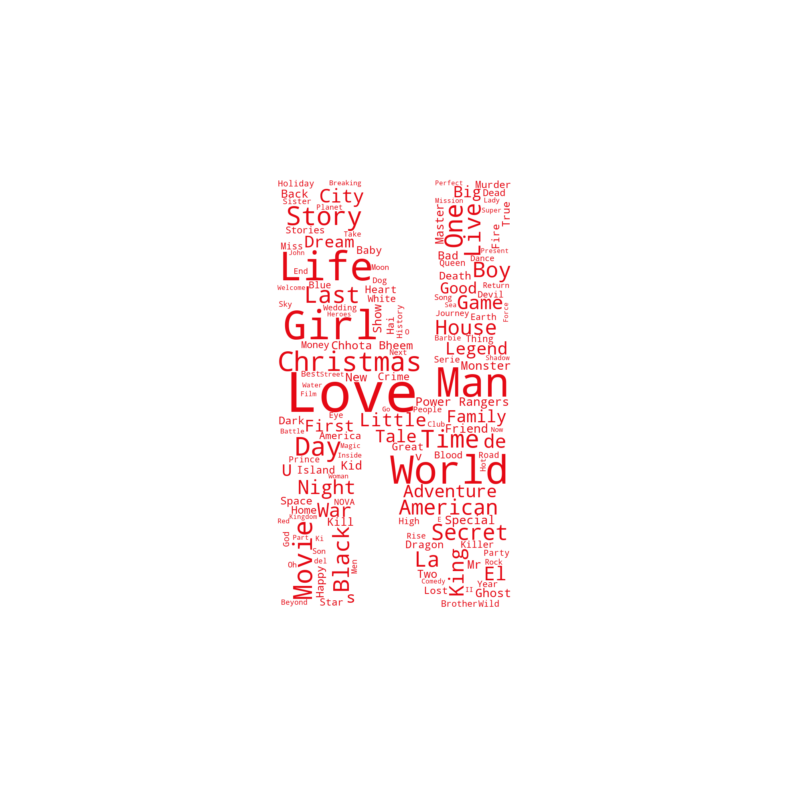

In [26]:
# wordcloud for netflix titles
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#E50914', '#E50914'])

text = ' '.join(df['title'])

mask = np.array(Image.open('/Users/indarkumar/Downloads/vecteezy_netflix-logo-icon-vector-on-white-background_6874247_459/vecteezy_netflix-logo-icon-vector-on-white-background_6874247.jpg'))

wordcloud = WordCloud(background_color = 'white', colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
